In [ ]:
!pip install seaborn

!pip install plotly

!pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  #highly interactive charts
import statistics
%matplotlib inline


In [ ]:
import matplotlib.gridspec as gridspec # to do the grid of plots

In [ ]:
df = pd.read_csv("creditcard.csv")

FileNotFoundError: ignored

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31775,36510,1.497714,-0.874208,0.004261,-1.537368,-1.044513,-0.733905,-0.644635,-0.186510,-2.380495,...,-0.527761,-1.248016,0.145825,-0.061193,0.250252,-0.526898,0.003761,0.007950,24.90,0.0
31776,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0.0
31777,36513,-0.434226,-3.705556,0.194223,0.139216,-2.066818,1.220137,-0.278115,0.281452,-0.161302,...,0.620431,0.040315,-0.690176,-0.226844,-0.123369,-0.291412,-0.080514,0.155457,861.12,0.0
31778,36513,-0.274278,1.004565,1.336430,-0.164777,0.404935,-0.418731,0.853252,-0.148772,-0.546969,...,-0.277437,-0.579135,-0.097793,-0.037926,-0.157882,0.044814,0.078376,-0.137035,9.72,0.0


In [ ]:
df.shape
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))


The dataset has 31780 rows and 31 columns


In [ ]:
##Salient Features of data:##
#Total 31 attributes (including class)
#Time is a Discrete-valued numeric attribute.
#V1 to V28 are Principal Components of the orginial dataset not avaliable to us.
#They are a result of Principal Component Analysis.
#They are continuous valued numeric attributes. We cannot say whether they are ratio-scaled or interval-scaled
#Amount is a continuous-valued numeric attribute.
#Class is a discrete-valued Binary attribute that takes value 0 for non-fraudulent transaction and 1 for fraud transaction.
#V1 to V28 are distributed aroud 0 and are scaled.
#From V1 to V28, the variance of attributes decreases from left to right, as expected from a PCA output.##

In [ ]:
# prinitng 5 number summary, basic info about the data
data_summary = df.describe()
data_summary.to_csv("data_summary.csv")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31779.000000,31779.000000,31779.000000,...,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000
mean,22329.432410,-0.212640,0.104667,0.721370,0.211236,-0.209710,0.088247,-0.120162,0.031883,0.314021,...,-0.033146,-0.119157,-0.040436,0.008409,0.134365,0.022637,0.012911,0.003384,81.115001,0.003210
std,12184.540274,1.854714,1.547456,1.589832,1.420692,1.408421,1.314428,1.283076,1.264390,1.250651,...,0.778376,0.640252,0.539220,0.591869,0.435709,0.508922,0.390404,0.300394,223.154481,0.056564
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10971.000000,-0.956800,-0.467657,0.257092,-0.702958,-0.807339,-0.651105,-0.597343,-0.159243,-0.482553,...,-0.242905,-0.541636,-0.177032,-0.326931,-0.128724,-0.333026,-0.063132,-0.007594,6.790000,0.000000
50%,27331.000000,-0.246371,0.135141,0.842625,0.198585,-0.243626,-0.167815,-0.071105,0.038210,0.196750,...,-0.087460,-0.094216,-0.050669,0.062628,0.173028,-0.059277,0.008684,0.020795,20.000000,0.000000
75%,32942.000000,1.164230,0.776101,1.468823,1.095675,0.308333,0.474682,0.441280,0.298470,1.063590,...,0.087763,0.289984,0.075411,0.398097,0.417497,0.301347,0.089173,0.076435,73.705000,0.000000
max,36513.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [ ]:
df[['Time', 'Amount']].describe()
# Time and Amount are not scaled.

,Time,Amount
count,31780.000000,31779.000000
mean,22329.432410,81.115001
std,12184.540274,223.154481
min,0.000000,0.000000
25%,10971.000000,6.790000
50%,27331.000000,20.000000
75%,32942.000000,73.705000
max,36513.000000,7879.420000


Non Fraudulent:  99.676 % of the dataset
Fraudulent:  0.321 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


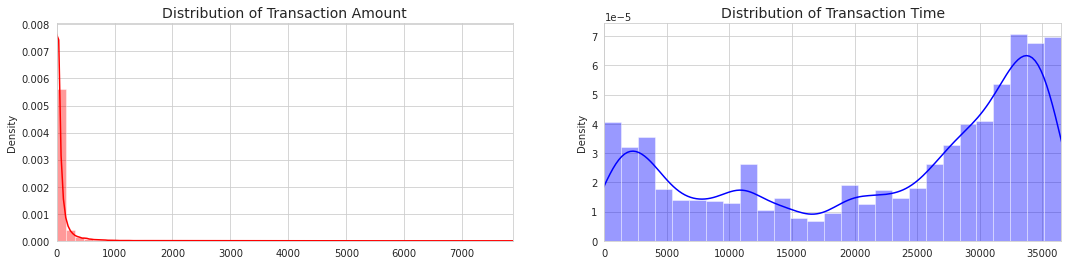

In [ ]:
# Time and Amount Distribution

print('Non Fraudulent: ', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
print('Fraudulent: ', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the dataset')

# colors = ["#0101DF", "#DF0101"]
# sns.countplot('Class', data=df, palette=colors)
# plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
# for i =1:30:

plt.show()

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# Finding which columns have the missing values
missing_val = []
for i in df.columns:
    if (' ?' in df[i].unique()):
        print(i)
        missing_val.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [ ]:
# Looking into each columns which have missing values
for i in missing_val:
    print(i, ':-')
    print('_'*20)
    print(df[i].value_counts())
    print('*'*20, '\n\n')


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

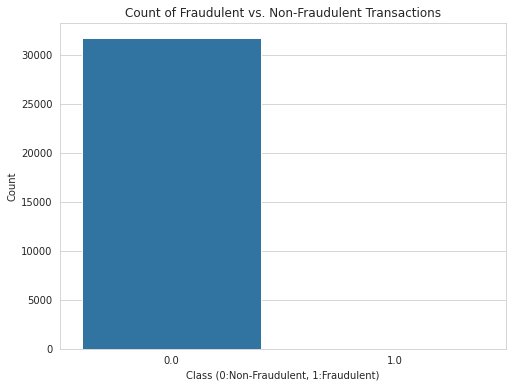

In [ ]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')


Text(0, 0.5, 'Amount')

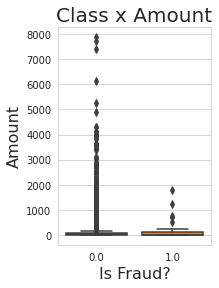

In [ ]:
# Class - Amount Plot
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)
# Total Data Objects with Class 0: 2,84,315 (99.83%) - non-fraud transactions
# Total Data Objects with Class 1: 492 (0.17%) - fraud transactions
#Therefore, the dataset has a strong imbalanced nature, where the problem is two-class classification.

In [ ]:
#There are only 7 points out of 2.8 Lakh having Amount > 10,000.
#Therefore these values should be excluded from dataset.

In [ ]:
df[df.Amount > 10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [ ]:
df = df[df.Amount < 10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,...,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000
mean,22328.986091,-0.212687,0.104667,0.721382,0.211223,-0.209711,0.088255,-0.120162,0.031883,0.314021,...,-0.033146,-0.119157,-0.040436,0.008409,0.134365,0.022637,0.012911,0.003384,81.115001,0.003210
std,12184.472200,1.854724,1.547480,1.589856,1.420712,1.408443,1.314448,1.283076,1.264390,1.250651,...,0.778376,0.640252,0.539220,0.591869,0.435709,0.508922,0.390404,0.300394,223.154481,0.056564
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10971.000000,-0.956821,-0.467724,0.257073,-0.702993,-0.807345,-0.651155,-0.597343,-0.159243,-0.482553,...,-0.242905,-0.541636,-0.177032,-0.326931,-0.128724,-0.333026,-0.063132,-0.007594,6.790000,0.000000
50%,27330.000000,-0.246696,0.135141,0.842637,0.198563,-0.243654,-0.167862,-0.071105,0.038210,0.196750,...,-0.087460,-0.094216,-0.050669,0.062628,0.173028,-0.059277,0.008684,0.020795,20.000000,0.000000
75%,32941.500000,1.164211,0.776124,1.468848,1.095693,0.308335,0.474693,0.441280,0.298470,1.063590,...,0.087763,0.289984,0.075411,0.398097,0.417497,0.301347,0.089173,0.076435,73.705000,0.000000
max,36513.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


Text(0, 0.5, 'Amount')

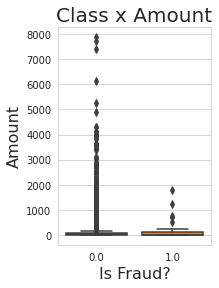

In [ ]:
#New distribution of amount with Class:
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount", fontsize = 16)

In [ ]:
#Creating new columns for ease in visualization
data_new = df
timedelta = pd.to_timedelta(data_new['Time'], unit='s')
#new variable for further analysis
data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
#new variable for further analysis
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Amounts by Minutes of Frauds and Normal Transactions')

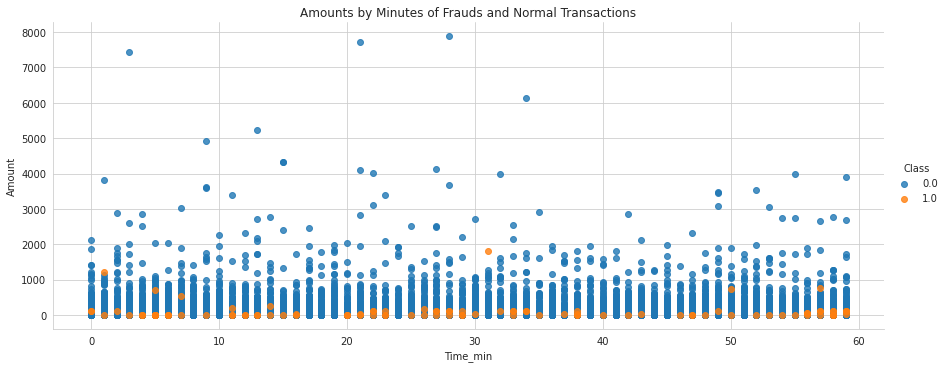

In [ ]:
#Looking at the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=2.5, data=data_new, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)
#plt.savefig('Amount_VS_Time_Scatter.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-1.0, 25.0)

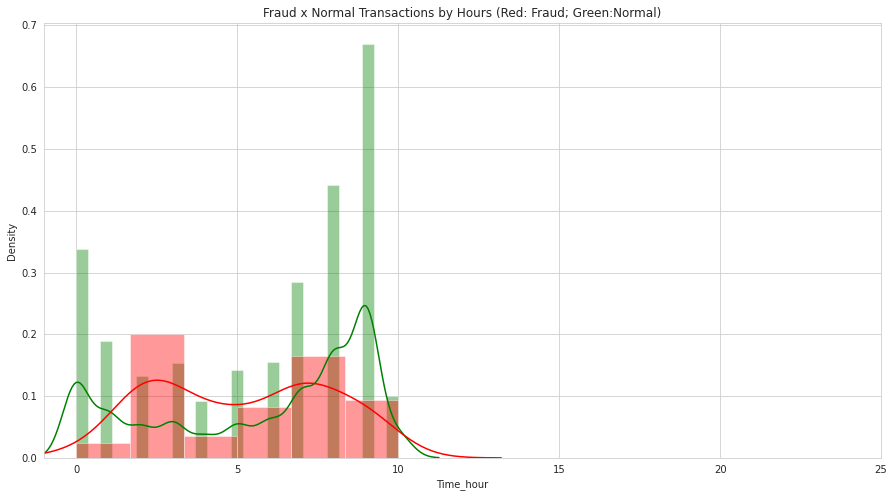

In [ ]:
#Exploring the distribuition by Class types throught hours
#Tried to get an idea of trend by hours in order to identify if at certains hours transcations peak, hinting at a higher probability of fraudulent transaction

plt.figure(figsize=(15,8))
# Non-Fraudulent Transactions over Time (in hr) - GREEN
sns.distplot(data_new[data_new['Class'] == 0]["Time_hour"],
             color='g')
# Fraudulent Transactions over time (in hr) - RED
sns.distplot(data_new[data_new['Class'] == 1]["Time_hour"],
             color='r')
plt.title('Fraud x Normal Transactions by Hours (Red: Fraud; Green:Normal)', fontsize=12)
plt.xlim([-1,25])
#plt.savefig('Time_distribution_fraud_NonFraud.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

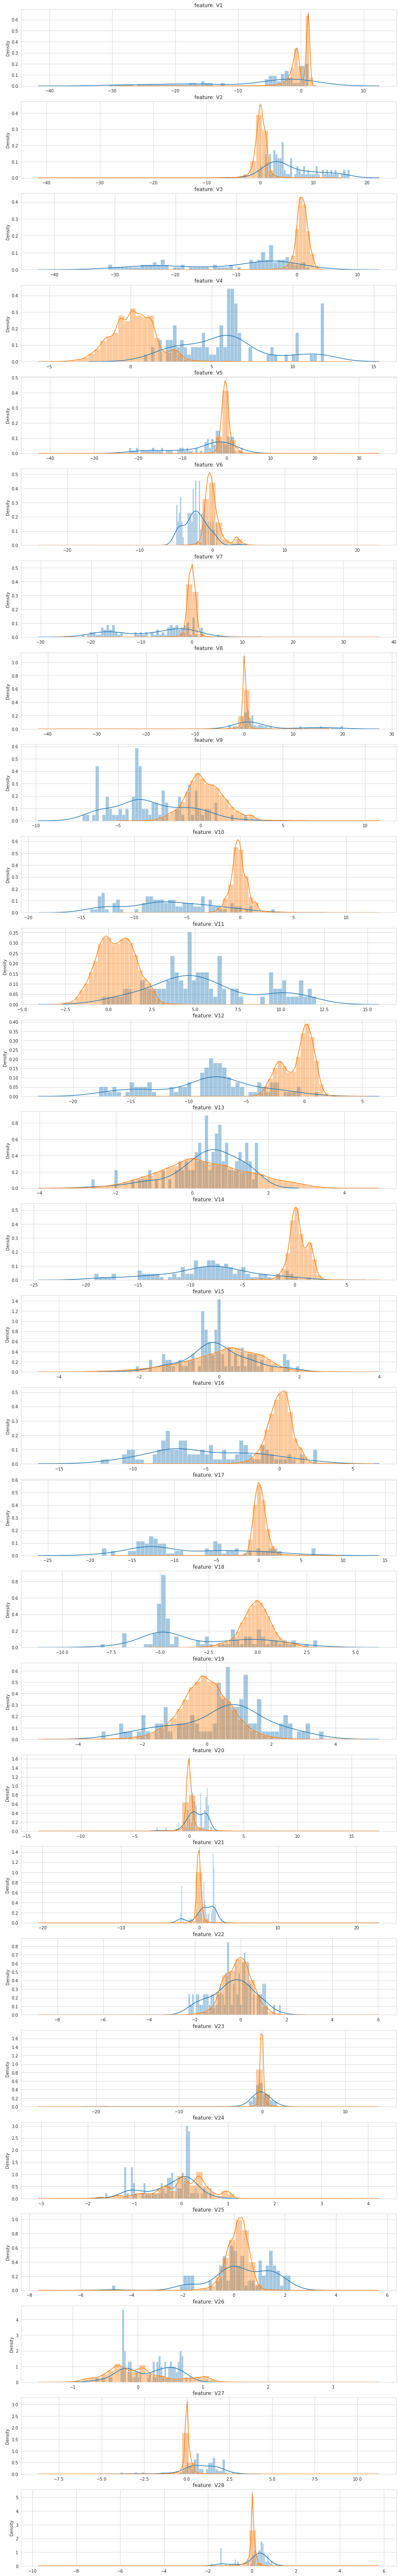

In [ ]:
#distribution of each class for syntethic variables between V1-V28
#If peaks of both classes occur at different peaks, we can decide on a threshold for that attribute - less data points so bias should be high.

plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data_new[data_new.iloc[:, 1:29].columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(data_new[cn][data_new.Class == 1], bins=50)
    sns.distplot(data_new[cn][data_new.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
#plt.savefig('Attribute_Distribution_with Class_Seperation.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

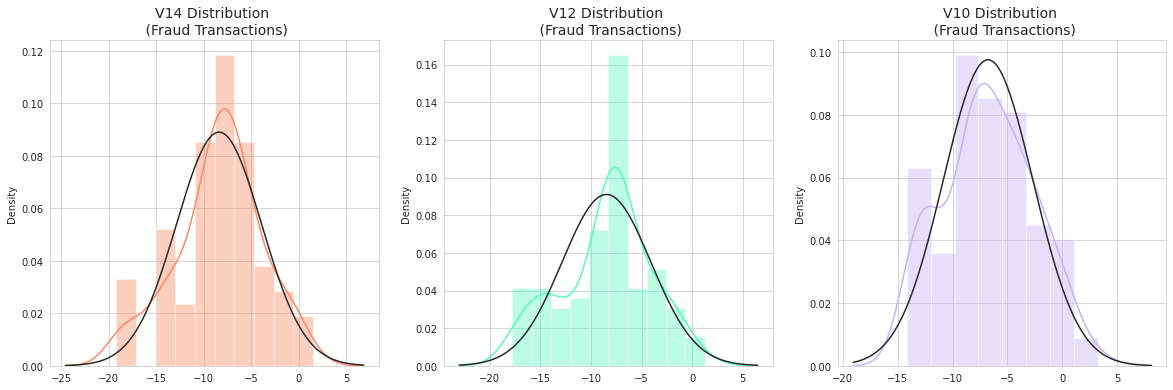

In [ ]:
#Which features follow normal distribution , only V14 so we couldn't use properties of Normal distribution -Kush#

from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
#As there is no nominal attribute, we don't use bar graphs for analysis.
#NO data cubing performed, as attributes have no hierarchy, and are continuous
#Scatter plot of all attributes Pairwise (Pair Plots)

In [ ]:
# sns.set(style="ticks")
# sns.pairplot(df, hue="Class")
#plt.savefig('pairplots_coloured')
# Observation: Fraudulent cases are concentrated near 0 in attribute V20, V27, V28 and Amount.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

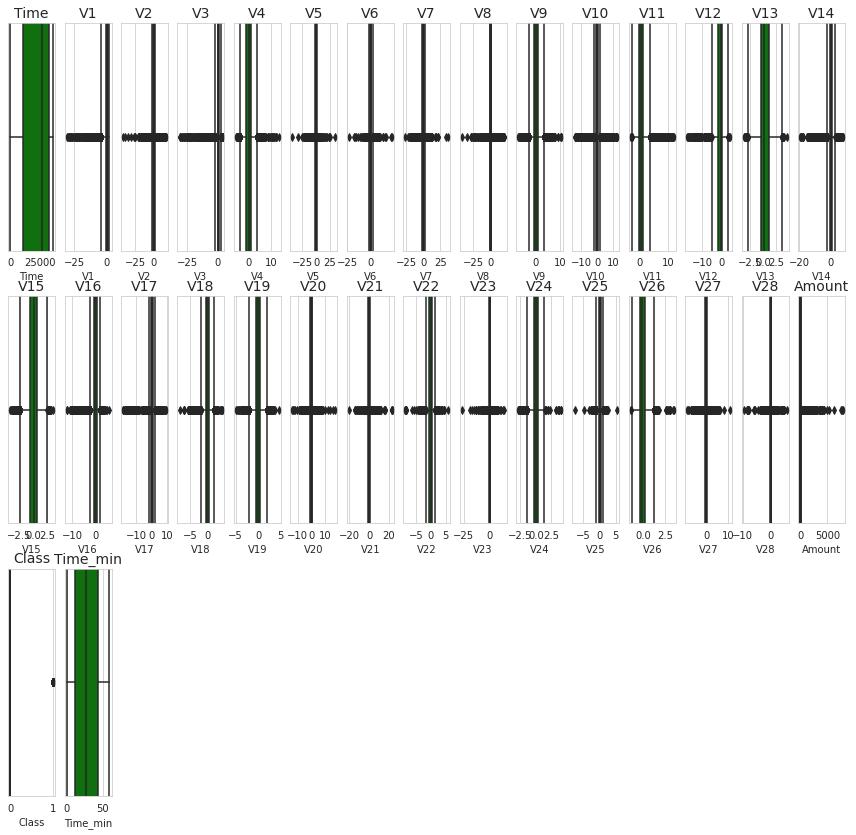

In [ ]:
#Box plots
l = df.columns.values 
number_of_columns= 15
number_of_rows = len(l)-1/number_of_columns #one column is of class so we won't take it for the corelation analysis
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v',width=20).set_title(l[i],fontsize=14)
#     plt.tight_layout()

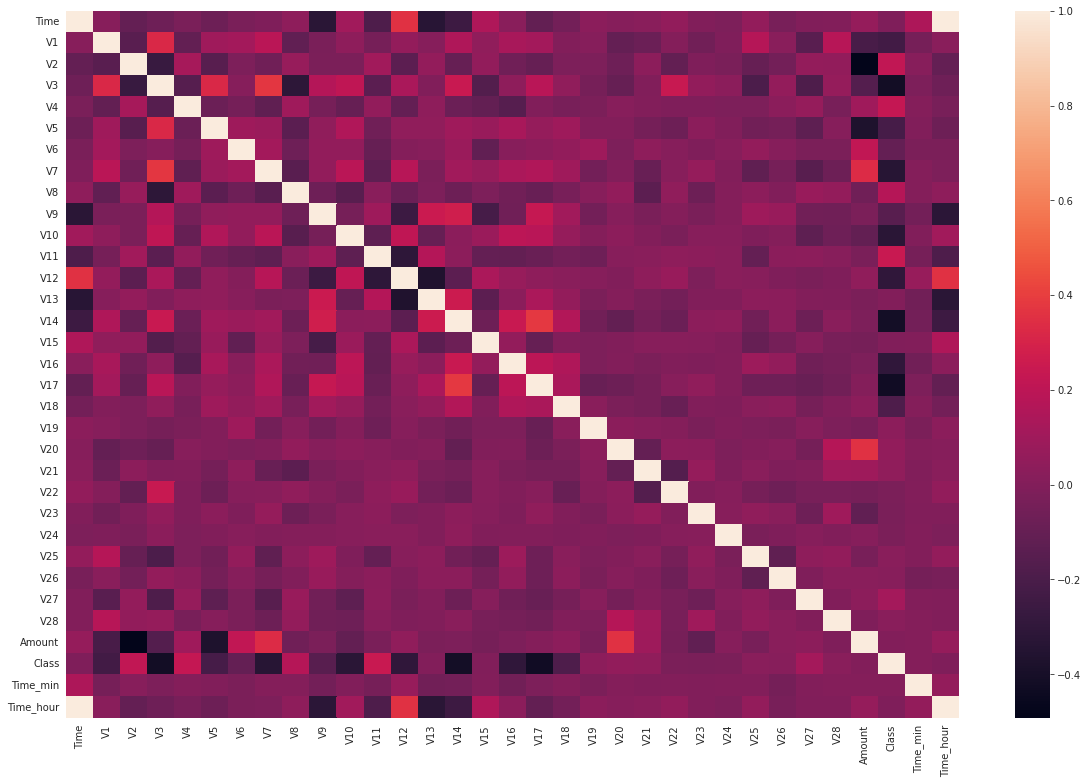

In [ ]:
#Correlation matrix heat-map
#Most of the pixels are dark pink in colour, which means most of attributes are independent of each other.
#Some cases are of positive correlation and some are negatively correlated.
#But Pearson’s product coefficient of all lies between (-0.5 to +0.5). Hence, we are not removing any attribute in this step.
#Negative correlation with class: V10, V12, V14, V17
#We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

plt.subplots(figsize=(20,13 ))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
#plt.savefig('corelation_matrix_heatmap.png')
#<matplotlib.axes._subplots.AxesSubplot at 0x1db34

In [ ]:
#Checking Missing Values
print('Are there any Missing values? : ',df.isnull().any().any())

Are there any Missing values? :  False


In [ ]:
#Data Consistency
#Data outliers are indicative fraud transactions - so explicit data smoothing not performed.
#Extreme outliers will be removed while training the model. We also plan to remove outliers during training the model via a new technique.

#Resolving Inconsistencies:
#As V1 to V28 are Principal Components, they don't have any inconsistencies.

#Scaling Data using Robust Scalar
# Reason: robust scaler is immune to outliers, as median is chosen as the central tendancy.
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df = df[['scaled_time','scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class']]
df.to_csv("scaled_data.csv")
print('Scaled Data\n')
df.head(10)

KeyError: ignored

In [ ]:
#Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


# print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
# print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels
original_Xtrain.to_csv("X_train.csv")
original_ytrain.to_csv("y_train.csv")
original_Xtest.to_csv("X_test.csv")
original_ytest.to_csv("y_test.csv")

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.9967747 0.0032253]
[0.99685287 0.00314713]


In [ ]:
#Reducing Rows via Random-Under Sampling: Numerosity Reduction:
#Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

#Lets shuffle the data before creating the subsamples

#Cosine Similarity Analysis not performed as data has very few zeros.
#Parametric Methods for numerosity reduction- NOT Applicable as we need to detect outliers

In [ ]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.to_csv('new_data.csv')
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
30100,0.384197,0.606740,-3.218952,2.708535,-3.263042,1.361866,-1.645776,-1.852982,-3.069958,-1.796876,...,0.571654,1.807877,-0.890421,-0.325814,0.123040,-0.093014,0.232106,-0.310519,-0.745295,1.0
31434,0.411097,-0.171860,0.043536,2.392799,-2.241497,1.296069,1.260976,-1.572737,1.238882,-0.516432,...,0.793279,-0.334345,-0.198735,0.011793,-0.436786,-0.164001,-0.385404,0.523540,0.037974,0.0
29529,0.372408,1.045954,-4.262419,3.892452,-5.787775,1.835288,-2.380610,-2.043299,-1.621864,3.224452,...,-0.020242,-0.028746,-0.401751,0.059081,0.203538,-0.092482,-0.400098,0.119127,-0.239110,0.0
15380,-0.025580,12.062019,-0.960634,0.390007,1.347678,3.631169,-3.359195,2.012264,0.708513,-2.848222,...,-0.818183,2.036147,-1.043756,-2.318050,1.113761,0.173145,0.248278,0.928353,0.033889,0.0
7657,-0.760747,1.942763,-1.324956,-0.131744,-0.108092,-0.422283,0.009549,-1.561814,0.580472,0.291543,...,0.222816,0.176229,0.078453,0.459242,0.480786,-0.973894,0.669531,0.142576,0.074069,0.0


Distribution of the Classes in the subsample dataset
0.0    0.828283
1.0    0.171717
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


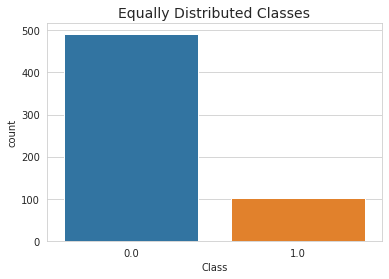

In [ ]:
#Further Analysis and Preprocessing of new Balanced Data Frame
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

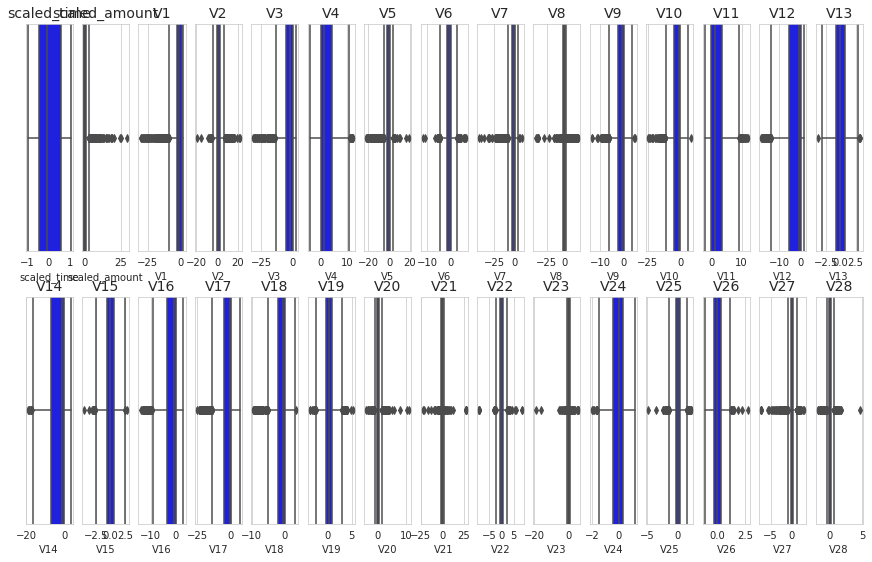

In [ ]:
#Now with this Balanced Dataset, we can apply more Supervised Learning Algorithms which was a short-coming on previous dataset (due to high class imbalance).

#New Boxplot

l = new_df.columns.values 
number_of_columns= 15
number_of_rows = len(l)-1/number_of_columns #one column is of class so we won't take it for the corelation analysis
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    #sns.set_style('whitegrid')
    sns.boxplot(new_df[l[i]],color='blue',orient='v',width=20).set_title(l[i],fontsize=14)
#     plt.tight_layout()

#plt.savefig('boxplots_new.png')

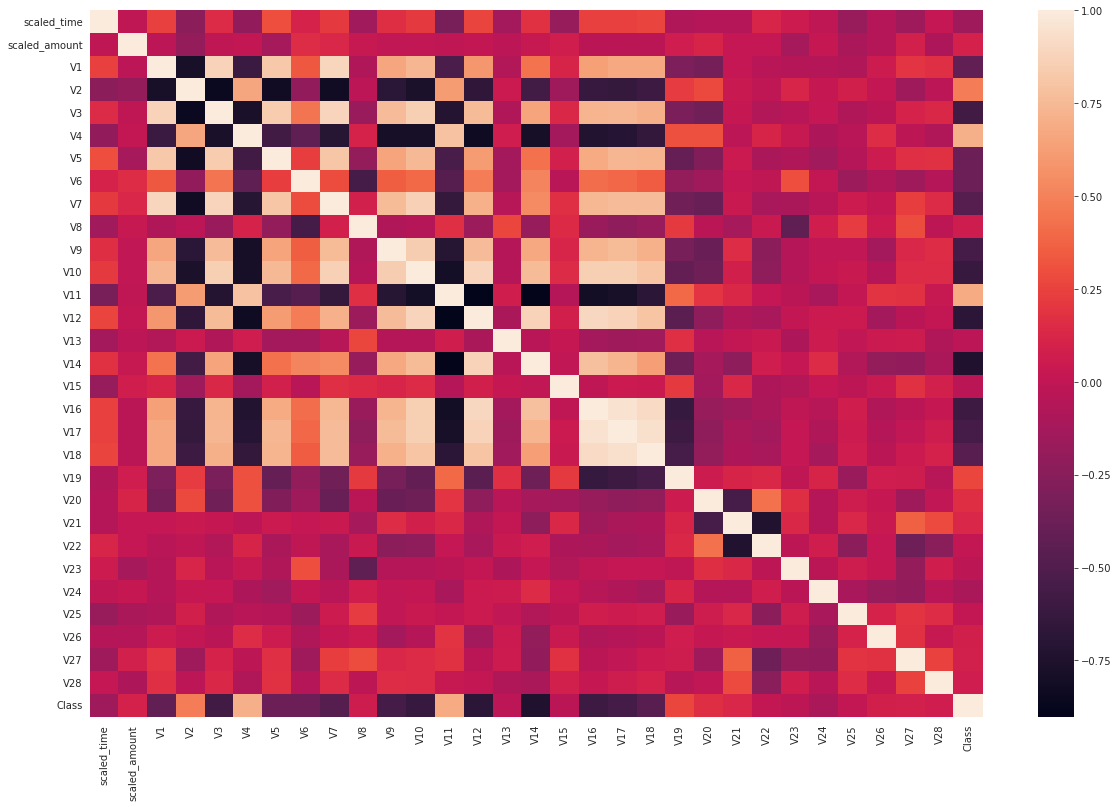

In [ ]:
#Correlation matrix heat-map on new Balanced Data
plt.subplots(figsize=(20,13 ))
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=False)
#plt.savefig('corelation_matrix_heatmap_new.png')

In [ ]:
l = new_df.columns.values
for i in range(31):
    for j in range(i):
        if(abs(correlation_matrix.iloc[i,j])>0.9 and i != j):
            print(l[i],l[j])

In [ ]:
#Note: We are not dropping any of the correlated columns because after performing classification, we found that the accuracy of our model decreases incase of dropping the columns.

In [ ]:
# new_df = new_df.drop(['V12', 'V17', 'V18'], axis = 1)
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
30100,0.384197,0.606740,-3.218952,2.708535,-3.263042,1.361866,-1.645776,-1.852982,-3.069958,-1.796876,...,0.571654,1.807877,-0.890421,-0.325814,0.123040,-0.093014,0.232106,-0.310519,-0.745295,1.0
31434,0.411097,-0.171860,0.043536,2.392799,-2.241497,1.296069,1.260976,-1.572737,1.238882,-0.516432,...,0.793279,-0.334345,-0.198735,0.011793,-0.436786,-0.164001,-0.385404,0.523540,0.037974,0.0
29529,0.372408,1.045954,-4.262419,3.892452,-5.787775,1.835288,-2.380610,-2.043299,-1.621864,3.224452,...,-0.020242,-0.028746,-0.401751,0.059081,0.203538,-0.092482,-0.400098,0.119127,-0.239110,0.0
15380,-0.025580,12.062019,-0.960634,0.390007,1.347678,3.631169,-3.359195,2.012264,0.708513,-2.848222,...,-0.818183,2.036147,-1.043756,-2.318050,1.113761,0.173145,0.248278,0.928353,0.033889,0.0
7657,-0.760747,1.942763,-1.324956,-0.131744,-0.108092,-0.422283,0.009549,-1.561814,0.580472,0.291543,...,0.222816,0.176229,0.078453,0.459242,0.480786,-0.973894,0.669531,0.142576,0.074069,0.0


In [ ]:
new_df.describe()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,-0.265912,1.048555,-1.477336,1.022619,-1.249296,1.199833,-1.173585,-0.353817,-1.423725,0.706621,...,0.146367,0.090409,-0.106397,-0.091713,-0.013883,0.172814,0.035597,0.150871,0.030880,0.171717
std,0.547664,3.715749,5.064070,3.238513,6.100077,2.739037,3.662399,1.539499,4.229383,3.057823,...,0.740174,0.764782,0.684509,0.947000,0.570709,0.626140,0.493250,0.622261,0.321167,0.377452
min,-1.236977,-0.298887,-30.552380,-9.436547,-31.103685,-4.449606,-22.105532,-4.977692,-21.922811,-6.497016,...,-5.742194,-2.475962,-2.900495,-19.254328,-1.751966,-4.781606,-1.134659,-3.908080,-1.869290,0.000000
25%,-0.771000,-0.239259,-1.470736,-0.356827,-0.360407,-0.464722,-1.182266,-0.936465,-0.896866,-0.146806,...,-0.165449,-0.222991,-0.543926,-0.197930,-0.340190,-0.135719,-0.319035,-0.041414,-0.001942,0.000000
50%,-0.080016,-0.015990,-0.376503,0.270204,0.657324,0.705309,-0.362607,-0.313351,-0.291248,0.074994,...,0.013571,-0.039056,-0.067341,-0.052158,0.071825,0.177564,-0.076904,0.031416,0.027526,0.000000
75%,0.241130,0.886946,1.114514,1.183413,1.344103,1.683839,0.202172,0.322864,0.320975,0.475545,...,0.308907,0.241141,0.319261,0.092415,0.374916,0.460449,0.379574,0.241125,0.121960,0.000000
max,0.417287,42.014496,1.517670,16.713389,3.771745,11.927512,5.171038,6.456410,10.784088,20.007208,...,5.768052,5.740097,1.896375,2.507706,1.113761,2.208209,1.468334,3.052358,1.168464,1.000000


In [ ]:
#The preprocessed dataset has 30 features and ~1000 data points with an equiprobable distribution

#Conclusion
#0) heavy imbalance
#1) Reducing data points from x to y
#2) Time and amount only explainable attributes - using prior knowldege for that (increasing bias necessary)
##3) Identifying properties of PCA features
#4) New correlations after under-sampling -dropping features 12,17,18 5) 2 way sampling and future tasks
#6) t-SNE

In [ ]:
#Outlier Removal
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -10.140200337183 | Quartile 75: -5.58044712038062
iqr: 4.55975321680238
Cut Off: 6.83962982520357
V14 Lower: -16.97983016238657
V14 Upper: 1.2591827048229502
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-17.7216383537133, -17.4759212828566, 1.50079377517002, -17.230202160711]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -15.808759847460033
V12 Upper: -0.12860010222095664
V12 outliers: [-15.969207520809]
Feature V12 Outliers for Fraud Cases: 1
Number of Instances after outliers removal: 253
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -15.945180665265163
V10 Upper: 3.6455978566776936
V10 outliers: []
Feature V10 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 2

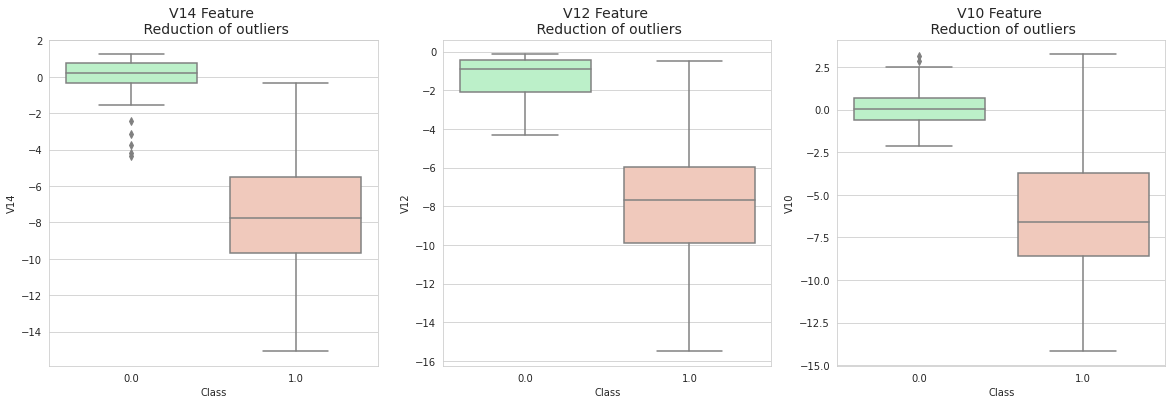

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [ ]:
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
30100,0.384197,0.606740,-3.218952,2.708535,-3.263042,1.361866,-1.645776,-1.852982,-3.069958,-1.796876,...,0.571654,1.807877,-0.890421,-0.325814,0.123040,-0.093014,0.232106,-0.310519,-0.745295,1.0
11841,-0.318518,-0.283942,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,...,0.993121,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1.0
15283,-0.030723,-0.269297,-1.331531,-0.180804,0.987013,0.497735,1.032420,-0.447651,-0.085221,0.192918,...,-0.232788,-0.147207,-0.392469,0.429822,-0.382981,-0.787362,0.112696,-0.114134,0.319970,0.0
30496,0.392481,1.370395,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,...,0.284555,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,1.0
24683,0.273093,-0.150191,-0.389682,0.227060,1.400254,-2.087282,0.168637,-0.127727,0.406573,-0.078765,...,0.199006,-0.096453,-0.178654,-0.194068,-0.809869,-0.051347,-0.505839,0.166155,-0.066200,0.0


In [ ]:
new_df.to_csv('outlier_removed_df.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

print("df shape", df.shape)
print("original_Xtrain shape", original_Xtrain.shape)
print("original_ytrain shape", original_ytrain.shape)
print("original_Xtest shape", original_Xtest.shape)
print("original_ytest shape", original_ytest.shape)

df shape (31779, 31)
original_Xtrain shape (25424, 30)
original_ytrain shape (25424,)
original_Xtest shape (6355, 30)
original_ytest shape (6355,)


In [ ]:
# Make Dataset

credit_card_4_5 = pd.concat([pd.DataFrame(original_Xtrain), pd.DataFrame(original_ytrain)], axis=1)
credit_card_1_5 = pd.concat([pd.DataFrame(original_Xtest), pd.DataFrame(original_ytest)], axis=1)

In [ ]:
credit_card_1_5.to_csv("credit_card_1_5.csv")
credit_card_4_5.to_csv("credit_card_4_5.csv")
print("credit_card_4_5 -> ", credit_card_4_5.shape)
print("credit_card_1_5 -> ", credit_card_1_5.shape)

credit_card_4_5 ->  (25424, 31)
credit_card_1_5 ->  (6355, 31)


In [ ]:
df = credit_card_4_5
nonfraud = df[df.Class == 0]
fraud = df[df.Class == 1]
print(fraud.shape)
print(nonfraud.shape)

print('-'*100)
print('-'*100)

(82, 31)
(25342, 31)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
#We have trained and tested 5 models:

#Isolation Forest
#Gaussian Anomaly Detection
#Logistic Regression
#Support Vector Classifier
#K-Nearest Neighors Classifier
#All our models were finally tested on a set of around 57,000 transactions, which had proportional 98 fraud transactions, which is roughly equivalent to 10 hours worth credit card transactions.

#When we trained and tested our models, there were various interesting observations.

#There was always a trade-off between the number of fraud transactions that were missed and the number of non-fraud transactions that were branded as fraudulent.

#Practically, for the European Bank this tradeoff can be modeled as a tradeoff between missed fraud transactions and work-force required.

In [ ]:
#CLASSIFICATION MODELS
df = pd.read_csv('credit_card_4_5.csv')
df = df.sample(frac=1)
df = df.drop(df.columns[0], axis=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1][:393]
non_fraud_df = df.loc[df['Class'] == 0][:393]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
# new_df.to_csv('new_data_4_5_shuffled.csv')
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
19816,0.329260,0.801763,1.286445,-0.642547,0.036574,-0.796832,-0.748542,-0.630182,-0.375677,-0.150759,...,0.233748,0.282668,0.588992,-0.225299,0.055527,0.631543,-0.121211,-0.020365,0.008468,0.0
23661,0.296944,-0.000747,1.324360,-0.306525,-0.448122,-0.620686,-0.434857,-0.849118,-0.268238,-0.071747,...,0.017835,0.271134,0.675721,-0.155237,0.179901,0.649415,-0.037159,-0.008371,0.010708,0.0
23137,0.061992,1.195397,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,...,1.715862,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,1.0
6438,-0.901709,-0.283942,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0
2104,-0.430304,-0.000149,1.076256,0.250711,0.502916,1.246392,0.136684,0.438216,-0.216999,0.155620,...,-0.221368,0.034257,0.382551,-0.060216,-0.337349,0.459101,-0.278657,0.016302,0.000954,0.0


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(original_ytrain == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(original_ytrain == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(original_Xtrain, original_ytrain.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 82
Before OverSampling, counts of label '0': 25342 

After OverSampling, the shape of train_X: (50684, 30)
After OverSampling, the shape of train_y: (50684,) 

After OverSampling, counts of label '1': 25342
After OverSampling, counts of label '0': 25342


In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(original_Xtest)

# print classification report
print(classification_report(original_ytest, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6335
         1.0       0.13      1.00      0.23        20

    accuracy                           0.98      6355
   macro avg       0.56      0.99      0.61      6355
weighted avg       1.00      0.98      0.99      6355



In [ ]:
lr1.score(X_train_res, y_train_res)

0.9770341725199274

In [ ]:
lr1.score(original_Xtest,original_ytest)

0.9785995279307632

In [ ]:
l=pd.Series(y_test)
l.value_counts()

0.0    6335
1.0      20
dtype: int64

In [ ]:
# Undersampling before cross validating (prone to overfit)
y_train = new_df['Class']
X_train = new_df.drop('Class', axis=1)

dftest = pd.read_csv('credit_card_1_5.csv')
dftest = dftest.drop(df.columns[0], axis=1)

y_test = dftest['Class']
X_test = dftest.drop('Class',axis=1)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Classification Report of  LogisiticRegression :
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1589
         1.0       0.36      1.00      0.53         5

    accuracy                           0.99      1594
   macro avg       0.68      1.00      0.76      1594
weighted avg       1.00      0.99      1.00      1594

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
Classification Report of  KNearest :
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1589
         1.0       0.38      1.00      0.56         5

    accuracy                           0.99      1594
   macro avg       0.69      1.00      0.78      1594
weighted avg       1.00      0.99      1.00      1594

Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score
Classification Report of  Support Vector Classifier :
               precision    recall  f1-scor

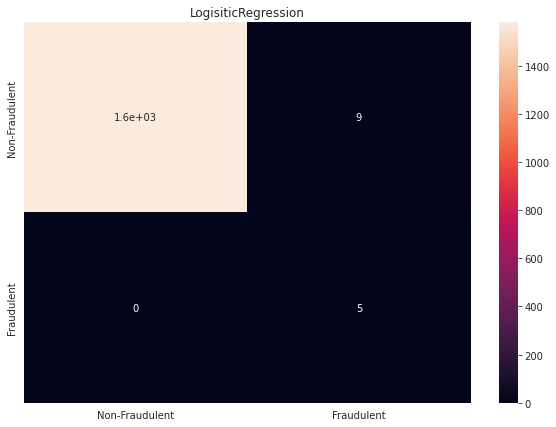

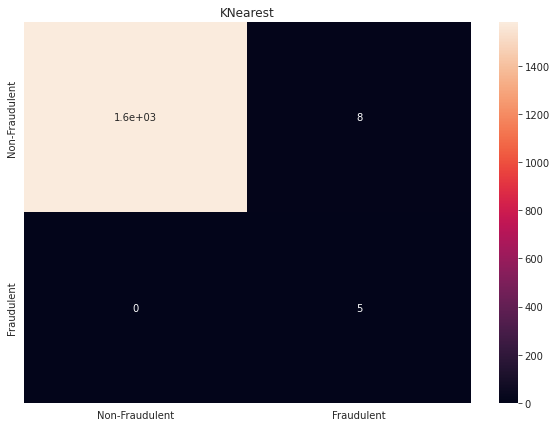

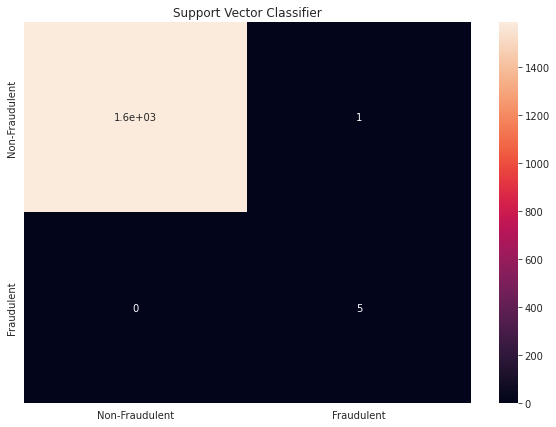

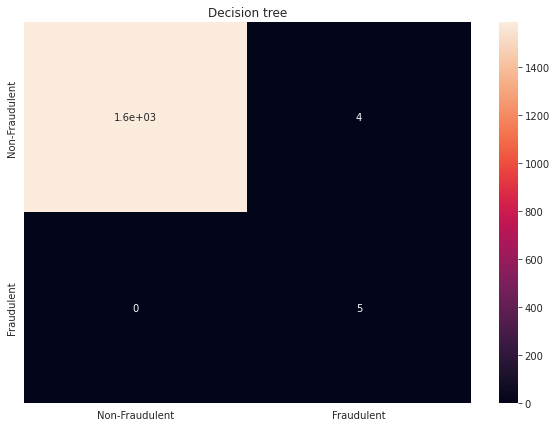

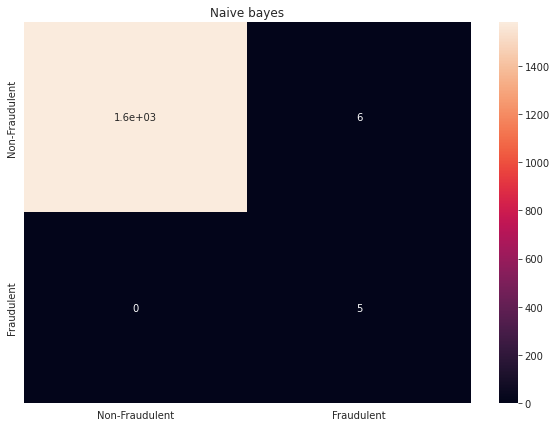

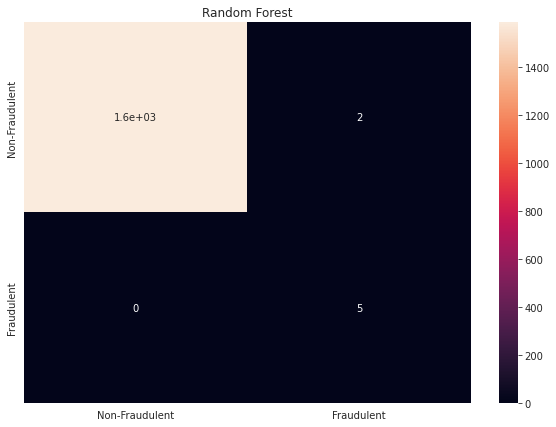

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision tree": DecisionTreeClassifier(),
    "Naive bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
#Let's see how our model performed
from sklearn.metrics import classification_report
classrep = []
confusionmatrices = {}
predicts = {}
for key, classifier in classifiers.items():
    classifier.fit(X_train_res, y_train_res)
    predictions = classifier.predict(original_Xtest)
    print('Classification Report of ',key,':\n',classification_report(original_ytest, predictions))
    predicts[key] = predictions
    classrep.append(classification_report(original_ytest, predictions));
    confusionmatrices[key] = confusion_matrix(original_ytest,predictions);
    df_cm = pd.DataFrame(confusion_matrix(original_ytest,predictions), index = [i for i in ['Non-Fraudulent','Fraudulent']],columns = [i for i in ['Non-Fraudulent','Fraudulent']])
    plt.figure(figsize = (10,7))
    plt.title(key)
    sns.heatmap(df_cm, annot=True)
    name = key + 'Confusion Matrix'
    plt.savefig(name)
#     print('The cofusion matrix for',key,':\n',confusion_matrix(y_test,predictions),'\n')
    training_score = cross_val_score(classifier, X_train_res, y_train_res, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [ ]:
for key, classifier in classifiers.items():
    print(classifier.score(original_Xtest,original_ytest))
   

0.9943538268506901
0.9949811794228356
0.9993726474278545
0.9974905897114178
0.9962358845671268
0.998745294855709


In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(30,20), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax5.set_title("GaussianNB \n Learning Curve", fontsize=14)
    ax5.set_xlabel('Training size (m)')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator6, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax6.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax6.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax6.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax6.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax6.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
    ax6.set_xlabel('Training size (m)')
    ax6.set_ylabel('Score')
    ax6.grid(True)
    ax6.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

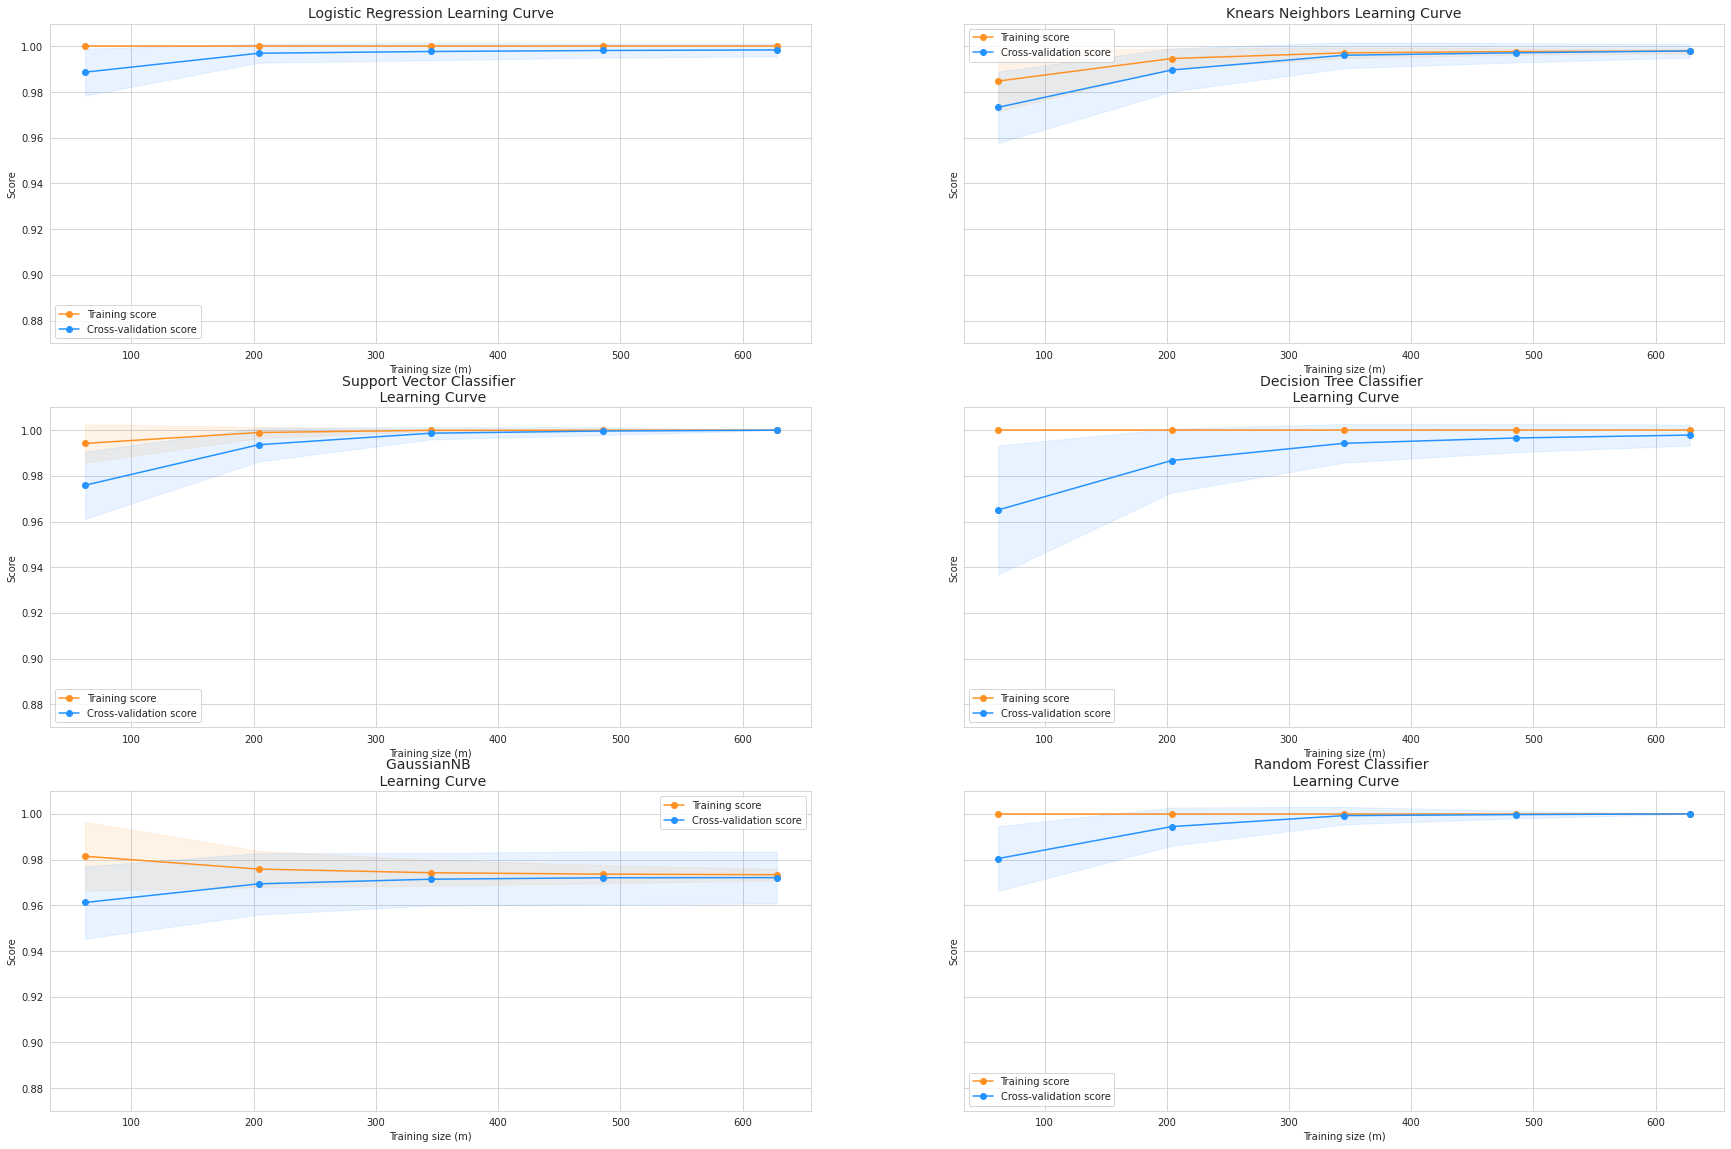

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(), X_train_res, y_train_res, (0.87, 1.01), cv=cv, n_jobs=6)

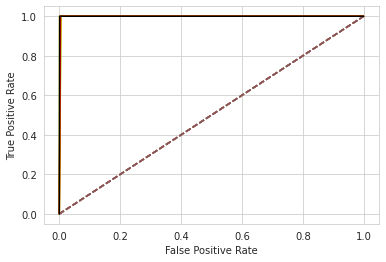

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={

    "LogisiticRegression": 'y-',
    "KNearest": 'y-',
    "Support Vector Classifier": 'y-',
    "Decision tree": 'y-',
    "Naive bayes": 'r-',
    "Random Forest": 'k-'

       }


for key, classifier in classifiers.items():
    fpr, tpr, thresholds = roc_curve(original_ytest, predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label=key)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    name = 'ROC curve for '+key
    
#     pyplot.title(name)

In [ ]:
Red: Logistic Regression

Yellow: Isolation Forest

Blue: KNN

Green: SVC

Conclusion:
Among all algorithms, Logistic Regression has the highest percentage of correctly identified transactions, while Gaussian Anomaly Detection had the highest accuracy.

Logistic Regression classified 85 out of 98 fraudulent transactions correctly, with 92% accuracy overall.

Only 5% of the fraud transactions were missed by Logistic Regression.

Number of non-fraudulent transactions classified as non-fraudulent: approx 1000.

Total Number of Transactions needed to be verified: approx 1100 in 10 hours

Assuming that one employee would need 10 minutes for manually verifying whether a transaction is actually fraud or not, he/she can verify 60 transactions in 10 hours.

Practically, the bank needs to have a team of 40 dedicated individuals, who would work in 2 shifts, if Logistic Regression is used.

If Gaussian Anomaly Detection is used, only 120 transactions need to be manually verified in 10 hours, with 99.84% accuracy which would need a team of 4 dedicated individuals only.

But 33% of the fraud transactions were missed by this method.

 

SyntaxError: ignored

In [ ]:
  # Print ROC curve
    plt.plot(fpr1,tpr1)
    plt.ylabel('True Positive Rate', fontsize = 14)
    plt.xlabel('False Positive Rate', fontsize = 14)
    plt.plot(fpr2,tpr2)
    plt.title('Receiver Operating Charachteristic (ROC) Curve for ANN (all features) and Logistic Regression',fontsize = 18, y = 1.03)
    plt.ylabel('True Positive Rate', fontsize = 14)
    plt.xlabel('False Positive Rate', fontsize = 14)
    plt.legend(['ANN','Logistic'])
    plt.show()
    #plotting of learning curves
    plot_learning_curves(Xtrain, ytrain.ravel(), Xtest, ytest.ravel(), model,scoring='mean_squared_error')
    plt.title('Learning curves for Logistic Regression model', fontsize = 18, y = 1.03)
    plt.ylim(0,0.35)
    plt.legend()
    plt.show()

In [ ]:
for key, classifier in classifiers.items():
     print(predicts[key])

[1. 1. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 0.]


In [ ]:
original_ytest

6338    1.0
6609    1.0
1775    0.0
7328    0.0
6022    0.0
       ... 
1367    0.0
669     0.0
7568    0.0
7136    0.0
4509    0.0
Name: Class, Length: 1594, dtype: float64